In [1]:
from dataloader import load_data_label_encoded
from trainer import train_model, evaluate_model
from snn import SNNModelSimple
import torch
import matplotlib.pyplot as plt
import pickle

In [ ]:
root_folder = "./tactile_dataset/"
file_name = "final_merged_df_sw500.csv"

train_losses_l = {}
train_accuracies_l = {}
val_losses_l = {}
val_accuracies_l = {}
test_accuracies_l = {}

for lr in [1e-4, 1e-3, 5e-3, 1e-2, 5e-2]:
    print(f"Training for lr={lr}")
    train_loader, val_loader, test_loader, num_outputs, num_features = load_data_label_encoded(root_folder, file_name, num_steps=100, batch_size=128)

    model = SNNModelSimple(num_features, num_outputs)
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    train_losses, train_accuracies, val_losses, val_accuracies = train_model(model, train_loader, val_loader, optimizer, criterion, num_epochs=10)
    train_losses_l[lr] = train_losses
    train_accuracies_l[lr] = train_accuracies
    val_losses_l[lr] = val_losses
    val_accuracies_l[lr] = val_accuracies

    test_accuracies_l[lr] = evaluate_model(model, test_loader)

out_file_name = 'exp3_lr_1e-4_5e-2_t_100_bs_128_ep_10.pkl'
with open(out_file_name, 'wb') as f:
    pickle.dump({"train_losses": train_losses_l, "train_accuracies": train_accuracies_l, "val_losses": val_losses_l, "val_accuracies": val_accuracies_l, "test_accuracies": test_accuracies_l}, f)


Training for lr=0.0001
Epoch 1/10, Train Loss: 2.0967, Train Accuracy: 24.60%, Val Loss: 1.8058, Val Accuracy: 33.09%, Time: 26.53s
Epoch 2/10, Train Loss: 1.7494, Train Accuracy: 34.10%, Val Loss: 1.7167, Val Accuracy: 35.25%, Time: 27.12s
Epoch 3/10, Train Loss: 1.7057, Train Accuracy: 35.39%, Val Loss: 1.6845, Val Accuracy: 36.02%, Time: 28.71s
Epoch 4/10, Train Loss: 1.6820, Train Accuracy: 36.12%, Val Loss: 1.6791, Val Accuracy: 36.54%, Time: 28.19s
Epoch 5/10, Train Loss: 1.6643, Train Accuracy: 36.66%, Val Loss: 1.6628, Val Accuracy: 36.73%, Time: 27.90s
Epoch 6/10, Train Loss: 1.6611, Train Accuracy: 36.79%, Val Loss: 1.6567, Val Accuracy: 36.84%, Time: 30.17s
Epoch 7/10, Train Loss: 1.6474, Train Accuracy: 37.10%, Val Loss: 1.6546, Val Accuracy: 36.66%, Time: 28.84s
Epoch 8/10, Train Loss: 1.6392, Train Accuracy: 37.30%, Val Loss: 1.6415, Val Accuracy: 37.51%, Time: 28.51s
Epoch 9/10, Train Loss: 1.6398, Train Accuracy: 37.21%, Val Loss: 1.6432, Val Accuracy: 37.03%, Time: 30.

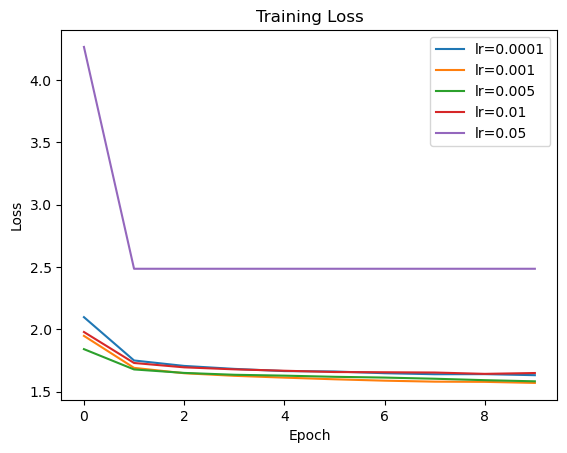

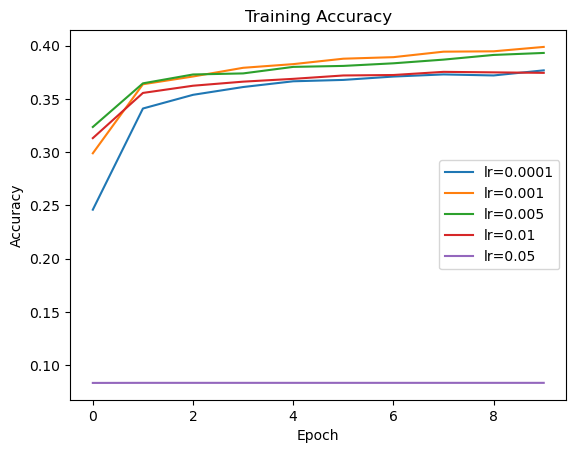

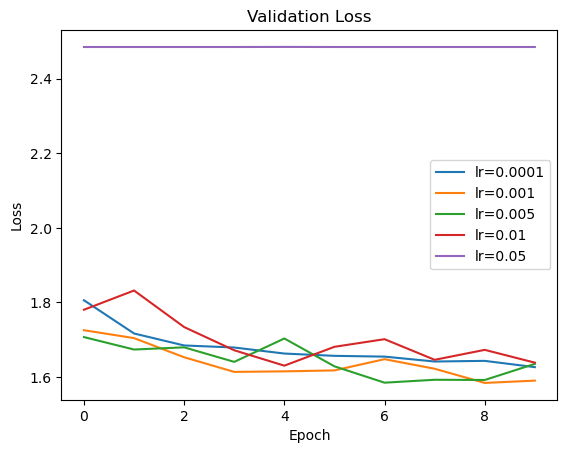

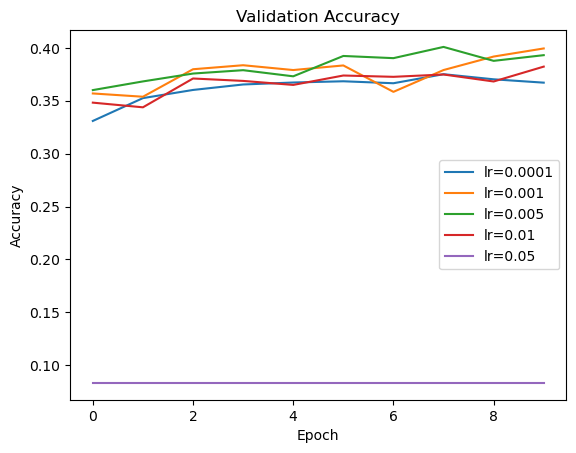

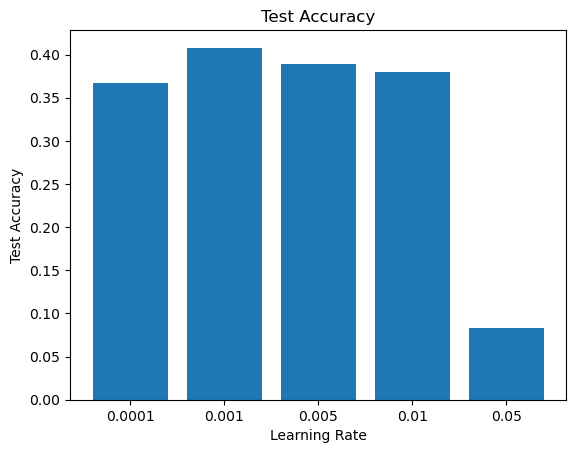

In [9]:
lrs = [1e-4, 1e-3, 5e-3, 1e-2, 5e-2]

plt.figure()
for lr in lrs:
    plt.plot(train_losses_l[lr], label=f"lr={lr}")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training Loss")
    plt.legend()

plt.figure()
for lr in lrs:
    plt.plot(train_accuracies_l[lr], label=f"lr={lr}")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Training Accuracy")
    plt.legend()

plt.figure()
for lr in lrs:
    plt.plot(val_losses_l[lr], label=f"lr={lr}")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Validation Loss")
    plt.legend()

plt.figure()
for lr in lrs:
    plt.plot(val_accuracies_l[lr], label=f"lr={lr}")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Validation Accuracy")
    plt.legend()

plt.figure()
# plot histogram of test accuracies
plt.bar([str(lr) for lr in lrs], [test_accuracies_l[lr] for lr in lrs])
plt.xlabel("Learning Rate")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy")
plt.show()